In [1]:
import time
import json
import nest_asyncio
import asyncio
import websockets
import numpy as np
import math
import random
import colorsys
import io
import base64
from PIL import Image
from tqdm.notebook import tqdm
nest_asyncio.apply()

In [2]:
async def websocket_test(payload, indent=None, quiet=False):
    uri = "ws://127.0.0.1:8765/ws"
    async with websockets.connect(uri) as ws:
        await ws.send(json.dumps(payload))
        if not quiet:
            print("✅ send:", payload)

        try:
            # 5 秒以内に返事が来なければ TimeoutError
            response = await asyncio.wait_for(ws.recv(), timeout=5)
            if not quiet:
                if indent:
                    print("📨 recv: ", json.dumps(json.loads(response), indent=indent, ensure_ascii=False))
                else:
                    print("📨 recv:", response)
            return json.loads(response)
        except asyncio.TimeoutError:
            print("⏰ タイムアウト（5 秒以内にメッセージが来ませんでした）")

In [3]:
payload = {
    "type": "screenshot",
    "width": 854,
    "height": 480,
}
response = await websocket_test(payload)

✅ send: {'type': 'screenshot', 'width': 854, 'height': 480}
📨 recv: {"data":{"image":"iVBORw0KGgoAAAANSUhEUgAAA1YAAAHgCAYAAACmUPwqAAAgAElEQVR4Aey9WYxlWXZYd9578YaY54zIObOy5qru6mb1wNmkRECiLFoGZMOCLMizCRuC+WH5Tx/2jwx+GIY+ZAKGLRuCaXH4MQgZoE3KpCnTcpNNsruqi1VdWVk5DzHP8/C81r7vRN54GRGZ1Wx2mzBPxH333jPus8+099n77Fv5pV//djtl1+axfZgqBzupujGfemY+SJXlO6mytZDS7lqq7K+ndLhNnF2ufVIdRvwieZHNIbeDw0p6sNRI7z1opMfL1bS8mdLqVkprO+20sZPS5l478Z8OLI4yi5TFLz4daMr3/GzQac/dYeX3chr9dZXi9sK/J+VxVuLT8j8pn+xnmvx8Vt6GvWi8nE85fvk5h3ffXyROd5qz3sv5lZ9PS3Ma/srxu+N0v+e43f7d78br9iveK13eDpFnXVekU/I6nq47jaHdfs97zzmeFi/75/tJ8U8Ly/75ntPme7f/ye+FL7/F/1ENq2RTAbl1/Ju1SuptpNTfSmm4tZ/evJzSG9fOpRvnz6XV9ZV0Z+ZRavUNpWvnz6exwd60ubWSNrZXGQEH5FLMH0U5GbbIvPRy1uMzKckRP9rZpo4psV1JPdV6ava0UrPen5qN3lStNtLyxnrAsbO3kRo9u2l8ZChNTp9PI2MTqVLrSTOPZ9PGympq1Oqpv7cv9TX7Ur3ak1a2d9PW4WEaI/7+wUFaWd2IeVAoo3t1Ot2TxQVw0qSselpcWU6/9d5s2ttrpd29atrZa6TN7cO0sXWY1jfbaY1rnTl2ey+lfaZl5+Fn+5N+unKdi+dKhQRVal69k4anptJ+pZ6qaTetznxaTNQDF0h2kNqrdwHyPleTfJa4XAeiMO7fD2dP0lHp74

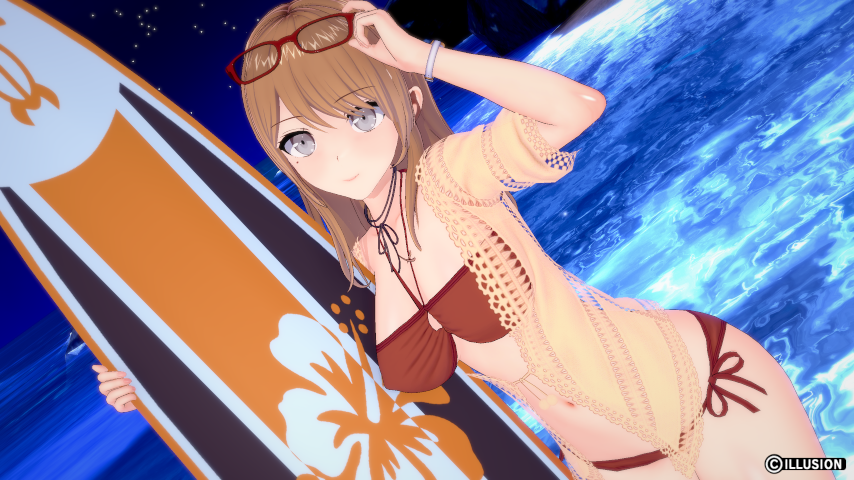

In [4]:
binary_data = base64.b64decode(response["data"]["image"])
image = Image.open(io.BytesIO(binary_data))
display(image)